### **Решение уравнения переноса**

##### Заданием данной лабораторной работы является разработка программы, осуществляющей поиск численного решения для уравнения переноса:

$$
\begin{equation*}
 \begin{cases}
    \frac{\partial u}{\partial t} + a \cdot \frac{\partial u}{\partial x} = f(t, x) , \:\:\: 0 \leq t \leq T, \:\:\: 0 \leq x \leq X
    \\
    u(x, 0) = \varphi(x), \:\:\: 0 \leq x \leq X
    \\
    u(0, t) = \psi(t), \:\:\: 0 \leq t \leq T
 \end{cases}
\end{equation*}
$$

##### Для решения задачи используется равномерная сетка с шагами τ по времени и h по координате. 

##### Функция $u(t,x)$ рассматривается в точках $t=k\tau$,  $x=mh$,  $0 \leq k \leq K$, $\leq m \leq M$,  $T=K\tau$,  $X=Mh$.


Будем использовать схему прямоугольник
$$
\dfrac{1}{2} \left(
\frac{u^{j}_{n-1} - u^{j-1}_{n-1}}{\tau} + 
\frac{u^{j}_{n} - u^{j-1}_{n}}{\tau}
\right) + 
\dfrac{
  c(x_n - 0.5 h, t_j - 0.5 \tau)
}{2} \left(
\frac{u^{j}_{n} - u^{j}_{n-1}}{h} + 
\frac{u^{j-1}_{n} - u^{j-1}_{n-1}}{h}
\right) = f(x_n - 0.5 h, t_j - 0.5 \tau)
$$
Выразим отсюда $u^{j}_{n}$:
$$
u^{j}_{n} = -\frac{ 
\dfrac{u^{j}_{n-1} - u^{j-1}_{n-1} - u^{j-1}_{n}}{2\tau} + 
\dfrac{
  c(x_n - 0.5 h, t_j - 0.5 \tau)
  \left(
    u^{j-1}_{n} - u^{j-1}_{n-1} - u^{j}_{n-1}
  \right)
}{2h} - f(x_n - 0.5 h, t_j - 0.5 \tau)}
{
  \dfrac{1}{2\tau} + 
\dfrac{
  c(x_n -  0.5 h, t_j - 0.5 \tau)
}{2h}
}
$$

##### Порядок аппроксимации: $O(\frac{h^{2}}{\tau} + \tau + h^{2})$
##### Cхема устойчива при $\frac{\tau}{h} \leq 1$


In [382]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

In [383]:
T = 1
X = 1
h = 1e-3
tau = 1e-3
N = int(X / h)
J = int(T / tau)
u = np.zeros((J, N))

def c(x, t):
  return 2

def f(x, t):
  return x + t

def phi(x):
  return np.cos(np.pi * x)

def psi(t):
  return np.exp(-t)

def get_next_u(j, n):
  by_t = u[j][n - 1] - u[j - 1][n - 1] - u[j - 1][n]
  by_t /= 2 * tau

  by_x = u[j - 1][n] - u[j - 1][n - 1] - u[j][n - 1]
  c_part = c((n - 0.5) * h, (j - 0.5) * tau) 
  by_x *= c_part / (2 * h)

  f_part = f((n - 0.5) * h, (j - 0.5) * tau)

  num = by_t + by_x - f_part

  den = 1 / (2 * tau) + c_part / (2 * h)

  return -num / den

def solve():
  for i in range(u.shape[0]):
    u[i][0] = psi(i * tau)

  for i in range(u.shape[1]):
    u[0][i] = phi(i * h)

  for j in range(1, u.shape[0]):
    for n in range(1, u.shape[1]):
      u[j][n] = get_next_u(j, n)
  return u

In [384]:
def plot(u):
  x = np.array([i * h for i in range(u.shape[1])])
  t = np.array([i * tau for i in range(u.shape[0])])

  x, y = np.meshgrid(x, t)
  fig = plt.figure(figsize=(15, 15))
  graph = plt.axes(projection='3d')
  surf = graph.plot_surface(x, y, u, cmap="plasma")
  graph.set_xlabel("$x$", fontsize=20)
  graph.set_ylabel("$t$", fontsize=20)
  graph.set_zlabel("$u(x, t)$", fontsize=20)
  fig.colorbar(surf, shrink=0.5)
  
  plt.grid()


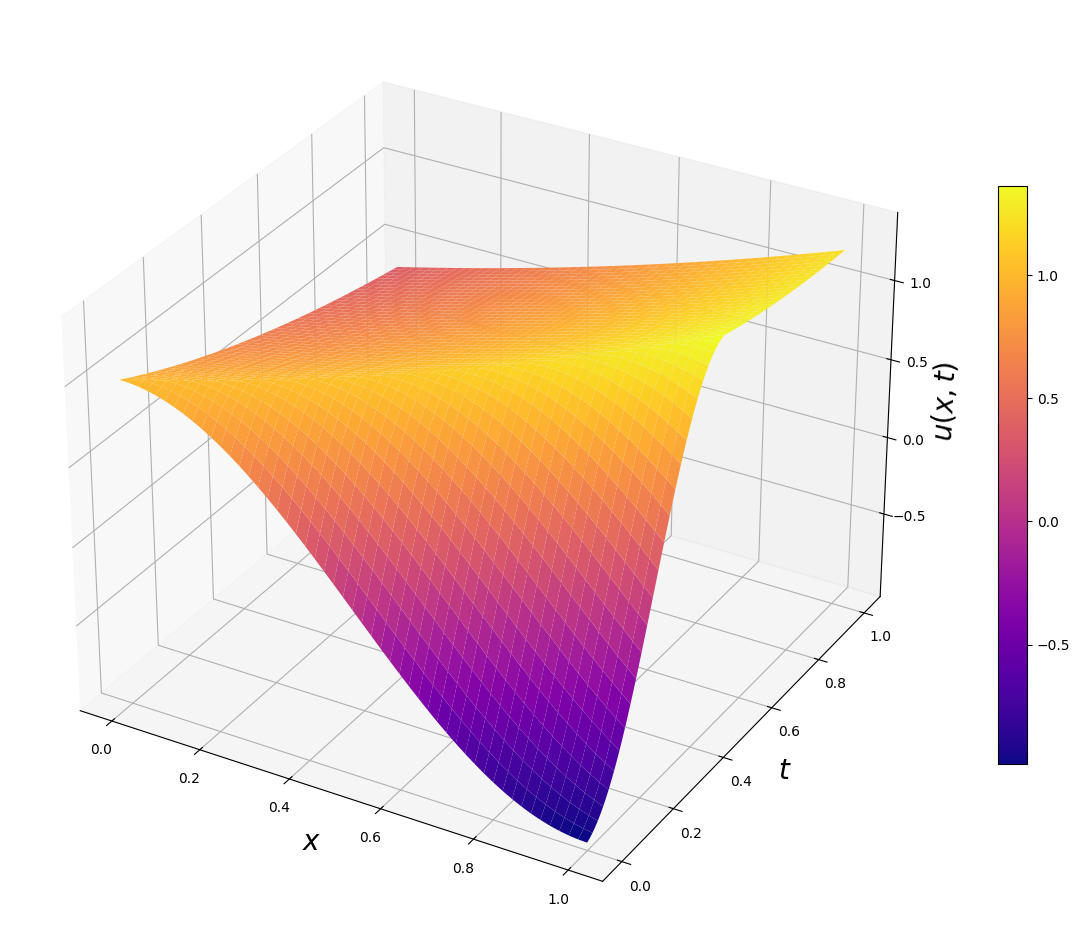

In [385]:
plot(solve())

### Сравнение решения с аналитическим

Программа численно решает задачу переноса:
$$
\begin{cases}
    \frac{\partial u (t, x)}{\partial t} + 2 \frac{\partial u(t, x)}{\partial x} = x + t, \ 0 \le t \le T, 0 \le x \le X \\
    u(0, x) = \cos(\pi x) \\
    u(t, 0) = \exp(-t)
\end{cases}
$$
Конечно-разностная схема крест:
$$
\frac{u^{k+1}_m - u^{k-1}_m}{2 \tau} + \frac{u^k_{m+1} - u^k_{m-1}}{2 h} = f^k_m
$$
Аналитическое решение задачи Коши:
$$
u(t, x) = \begin{cases}
                xt - \frac{t^2}{2} + \cos(\pi(2t - x)), \ 2t \le x \\
                xt - \frac{t^2}{2} + \frac{(2t - x)^2}{8} + \exp(-(t - \frac{x}{2})), \ 2t > x
          \end{cases}
$$

In [386]:
def solv_analytical():
    data = np.zeros((t_steps, x_steps))
    for t_index, t in enumerate(np.linspace(0, 1, t_steps)):
        for x_index, x in enumerate(np.linspace(0, 1, x_steps)):
            if (2 * t <= x):
                data[t_index][x_index] = x * t - t ** 2 / 2 + np.cos(np.pi * (2 * t - x))
            else:
                data[t_index][x_index] = x * t - t ** 2 / 2 + (2 * t - x) ** 2 / 8 + np.exp(-(t - x / 2))
    return data

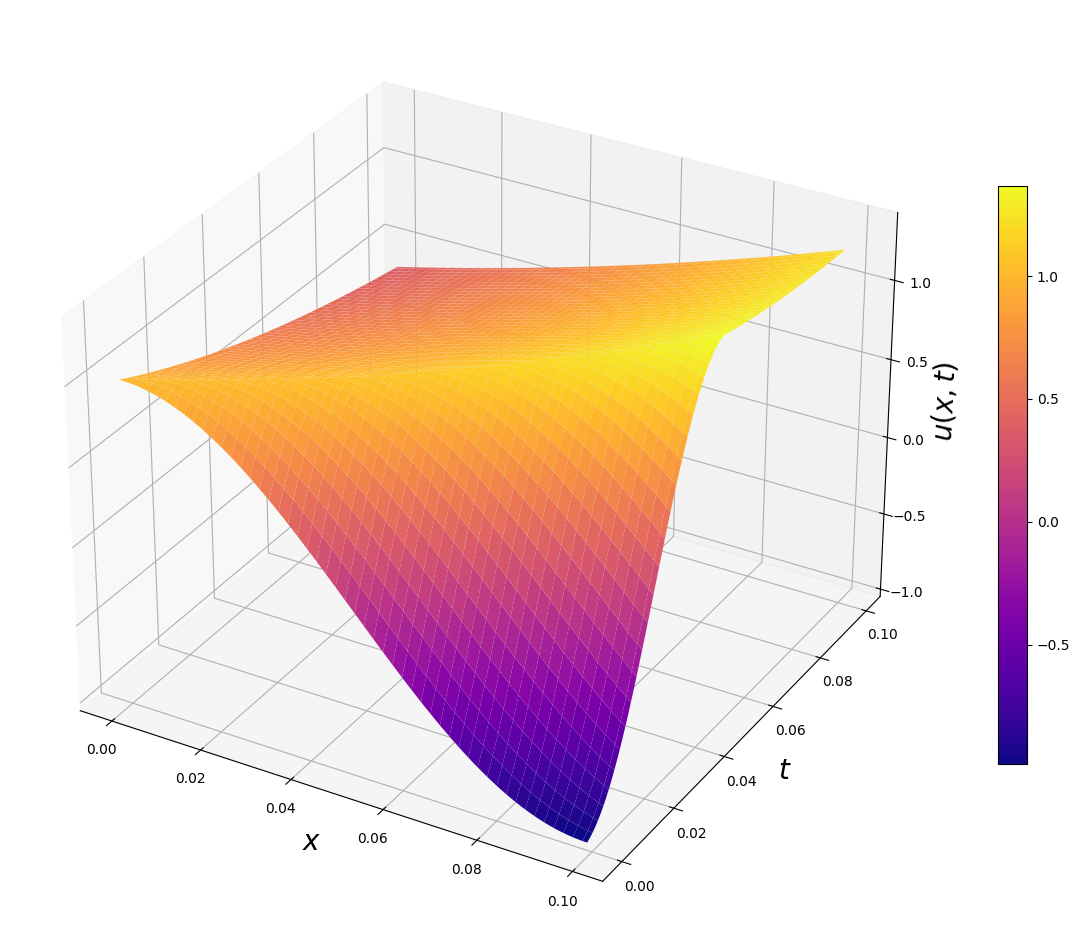

In [387]:
plot(solv_analytical())

MovieWriter imagemagick unavailable; using Pillow instead.


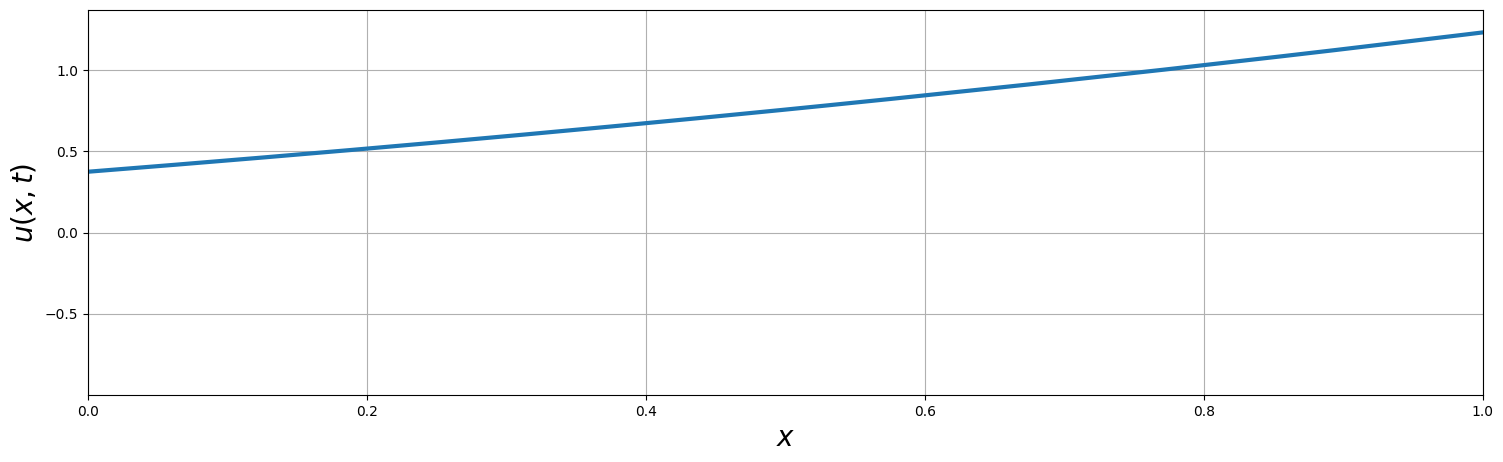

In [388]:
fig = plt.figure(figsize=(18, 5))
ax = plt.axes(xlim=(0, X), ylim=[np.min(u), np.max(u)])
line, = ax.plot([], [], lw=3)
ax.grid()
ax.set_ylabel("$u(x, t)$", fontsize=20)
ax.set_xlabel("$x$", fontsize=20)

frames_amount = 60

def init():
  line.set_data([], [])
  return line,

def animate(i):
  x = np.array([i * h for i in range(u.shape[1])])
  line.set_data(x, u[int(i / frames_amount * (u.shape[0] - 1))])
  return line,

anim = FuncAnimation(fig, animate, init_func=init, frames=frames_amount, interval=60, blit=True)
anim.save('solution.gif', writer='imagemagick')